In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import colors
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = 200
import os
import numpy as np
import pandas as pd

import mplhep as hep
plt.style.use(hep.style.CMS)

In [2]:
output_folder = "/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/RecoPlots/RecoComparison_v3_UL18"
os.makedirs(output_folder, exist_ok=True)

In [3]:
df_ev_ele = pd.HDFStore("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/reco_comparison/electrons/ele_UL18_123X_algoA_v2_event.h5py", "r")["df"]
df_ev_gamma = pd.HDFStore("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/reco_comparison/gammas/gamma_UL18_123X_algoA_v2_event.h5py", "r")["df"]

In [134]:
df_ev_all= pd.concat([df_ev_ele, df_ev_gamma])

In [17]:
df_ev_ele_B = pd.HDFStore("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/reco_comparison/electrons/ele_UL18_123X_algoB_v2_event.h5py", "r")["df"]

In [14]:
df_ev_ele_C = pd.HDFStore("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/reco_comparison/electrons/ele_UL18_123X_algoC_v2_event.h5py", "r")["df"]

In [4]:
df_ev_ele.columns

Index(['output_event.csv', 'ncls_tot_deepsc', 'ncls_tot_must',
       'nseeds_calomatched', 'nseeds_calomatched_deepsc',
       'nseeds_calomatched_must', 'nseeds_deepsc', 'nseeds_must',
       'nseeds_nocalomatched', 'seeds_calomatched_deepsc',
       'seeds_calomatched_must', 'seeds_deepsc', 'seeds_must'],
      dtype='object')

# Analysis of event info

DeepSC:  2253415
Mustache:  2309637


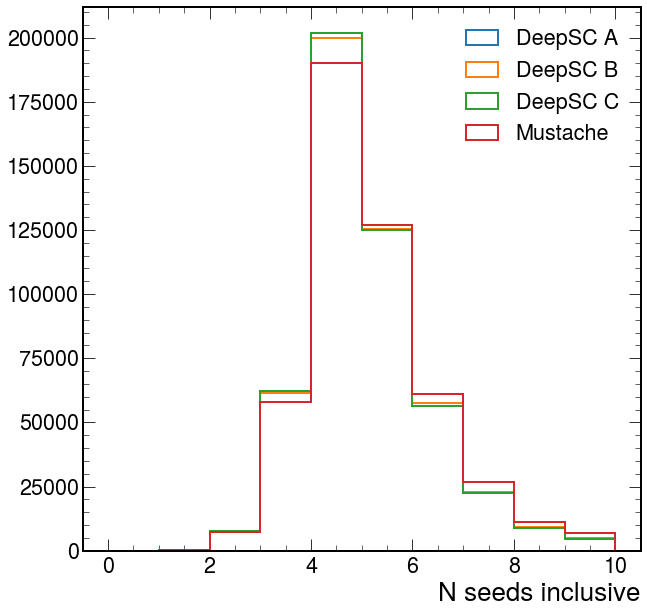

In [19]:
plt.hist(df_ev_ele.nseeds_deepsc, bins=10, range=(0,10), linewidth=2, histtype="step", label="DeepSC A",)
plt.hist(df_ev_ele_B.nseeds_deepsc, bins=10, range=(0,10), linewidth=2, histtype="step", label="DeepSC B",)
plt.hist(df_ev_ele_C.nseeds_deepsc, bins=10, range=(0,10), linewidth=2, histtype="step", label="DeepSC C",)
plt.hist(df_ev_ele.nseeds_must, bins=10, range=(0,10), linewidth=2, histtype="step", label="Mustache",)
plt.legend()
plt.xlabel("N seeds inclusive")
fig.savefig(output_folder + "/number_of_seeds_inclusive.png")
fig.savefig(output_folder + "/number_of_seeds_inclusive.pdf")

print("DeepSC: " , np.sum(df_ev_ele.nseeds_deepsc))
print("Mustache: " , np.sum(df_ev_ele.nseeds_must))

Text(1, 0, 'N. seeds calo-matched')

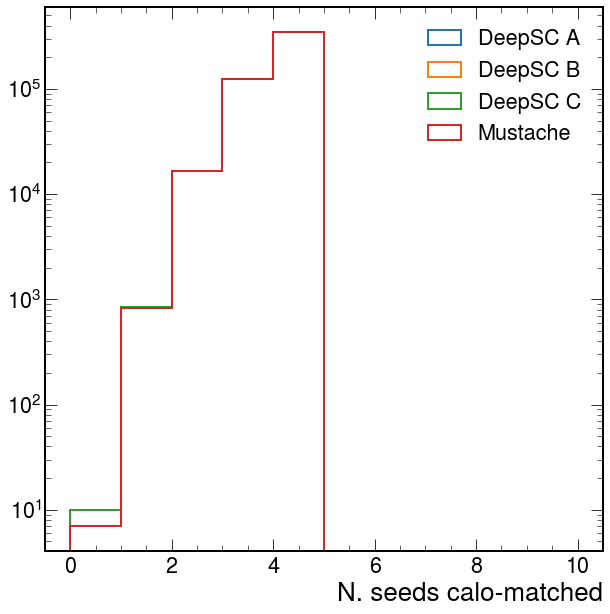

In [21]:
plt.hist(df_ev_ele.nseeds_calomatched_deepsc, bins=10, range=(0,10), linewidth=2, histtype="step", label="DeepSC A",)
plt.hist(df_ev_ele_B.nseeds_calomatched_deepsc, bins=10, range=(0,10), linewidth=2, histtype="step", label="DeepSC B",)
plt.hist(df_ev_ele_C.nseeds_calomatched_deepsc, bins=10, range=(0,10), linewidth=2, histtype="step", label="DeepSC C",)
plt.hist(df_ev_ele.nseeds_calomatched_must, bins=10, range=(0,10), linewidth=2, histtype="step", label="Mustache",)
plt.legend()
plt.yscale("log")
plt.xlabel("N. seeds calo-matched")

In [23]:
A[0]

array([   826,  16530, 124823, 347914,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0])

/tmp/ipykernel_701/894313297.py:6: RuntimeWarning: invalid value encountered in true_divide
  R = B[0] / A[0]
No handles with labels found to put in legend.


(0.8, 1.2)

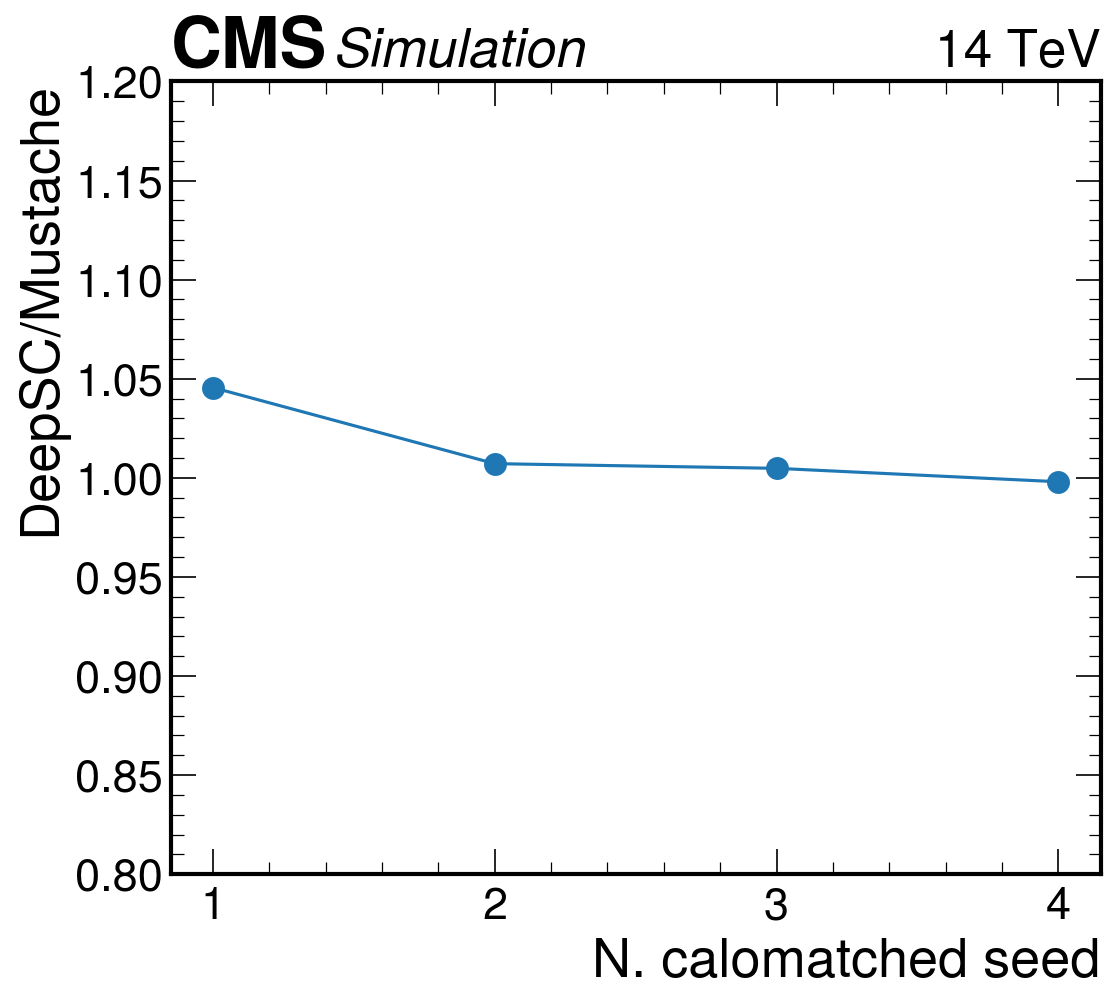

In [27]:
mask = df_ev_ele.nseeds_calomatched == 4

A = np.histogram(df_ev_ele[mask].nseeds_calomatched_must, range=(1,15), bins=14)
B = np.histogram(df_ev_ele[mask].nseeds_calomatched_deepsc, range=(1,15), bins=14)
        
R = B[0] / A[0]

fig,ax = plt.subplots(1,1, figsize=(8,7),dpi=150)

ax.plot(A[1][:-1], R, marker='o', markersize=10)

hep.cms.label(rlabel="14 TeV", loc=0, ax=ax)
ax.legend()
ax.set_xlabel("N. calomatched seed")
ax.set_ylabel("DeepSC/Mustache")
ax.set_ylim(0.8, 1.2)                                       

# fig.savefig(output_folder + "/number_of_clusters_by_eta_selected_{}.png".format(flavour))
# fig.savefig(output_folder + "/number_of_clusters_by_eta_selected_{}.pdf".format(flavour))




(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 2.46000e+02, 0.00000e+00,
        0.00000e+00, 2.44350e+04, 0.00000e+00, 0.00000e+00, 8.99018e+05]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

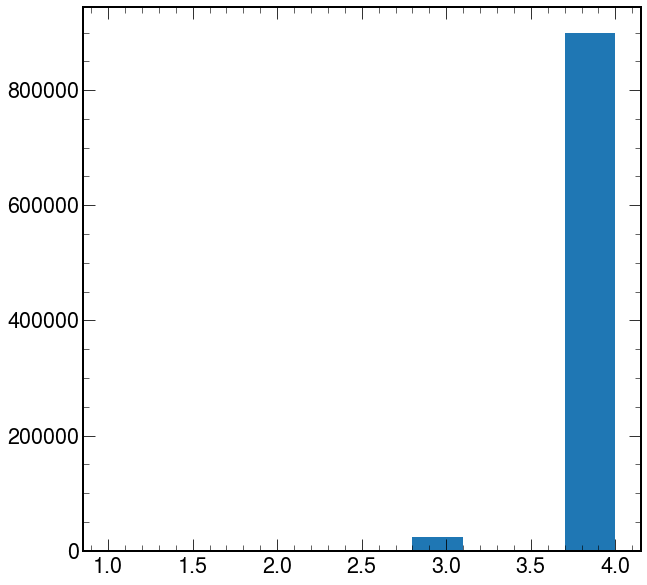

In [135]:
plt.hist(df_ev_all.nseeds_calomatched)

In [121]:
df_ev_ele.columns

Index(['output_event.csv', 'ncls_tot_deepsc', 'ncls_tot_must',
       'nseeds_calomatched', 'nseeds_calomatched_deepsc',
       'nseeds_calomatched_must', 'nseeds_deepsc', 'nseeds_must',
       'nseeds_nocalomatched', 'seeds_calomatched_deepsc',
       'seeds_calomatched_must', 'seeds_deepsc', 'seeds_must'],
      dtype='object')

In [122]:
df_ev_ele.seeds_deepsc

0                     [3, 4, 0, 2]
1                     [2, 4, 0, 1]
2                     [1, 2, 0, 3]
3                 [3, 7, 63, 0, 1]
4        [1, 4, 12, 27, 36, 0, 13]
                   ...            
9995                     [1, 0, 2]
9996          [7, 22, 63, 0, 4, 5]
9997              [12, 9, 0, 1, 5]
9998                  [3, 0, 6, 4]
9999    [1, 8, 0, 3, 4, 5, 19, 10]
Name: seeds_deepsc, Length: 490100, dtype: object

In [125]:
df_ev_ele.seeds_must

0                         [3, 4, 0, 2]
1                         [2, 4, 0, 1]
2                         [1, 2, 0, 3]
3                         [3, 7, 0, 1]
4            [1, 4, 12, 27, 36, 0, 13]
                     ...              
9995                         [1, 0, 2]
9996              [7, 22, 63, 0, 4, 5]
9997                  [12, 9, 0, 1, 5]
9998                      [3, 0, 6, 4]
9999    [1, 8, 44, 0, 3, 4, 5, 19, 10]
Name: seeds_must, Length: 490100, dtype: object

In [133]:
type(df_ev_ele.iloc[0].seeds_must)

str

In [126]:
np.setdiff1d(df_ev_ele.seeds_must[0], df_ev_ele.seeds_deepsc[0], assume_unique=False)

array(['[0, 2, 25, 1, 13]', '[1, 2, 24, 41, 0, 3]', '[1, 3, 10, 0]',
       '[1, 3, 31, 100, 2, 0]', '[1, 8, 65, 0, 4]', '[3, 10, 0, 1, 6]',
       '[3, 6, 0, 1, 2, 4]'], dtype=object)

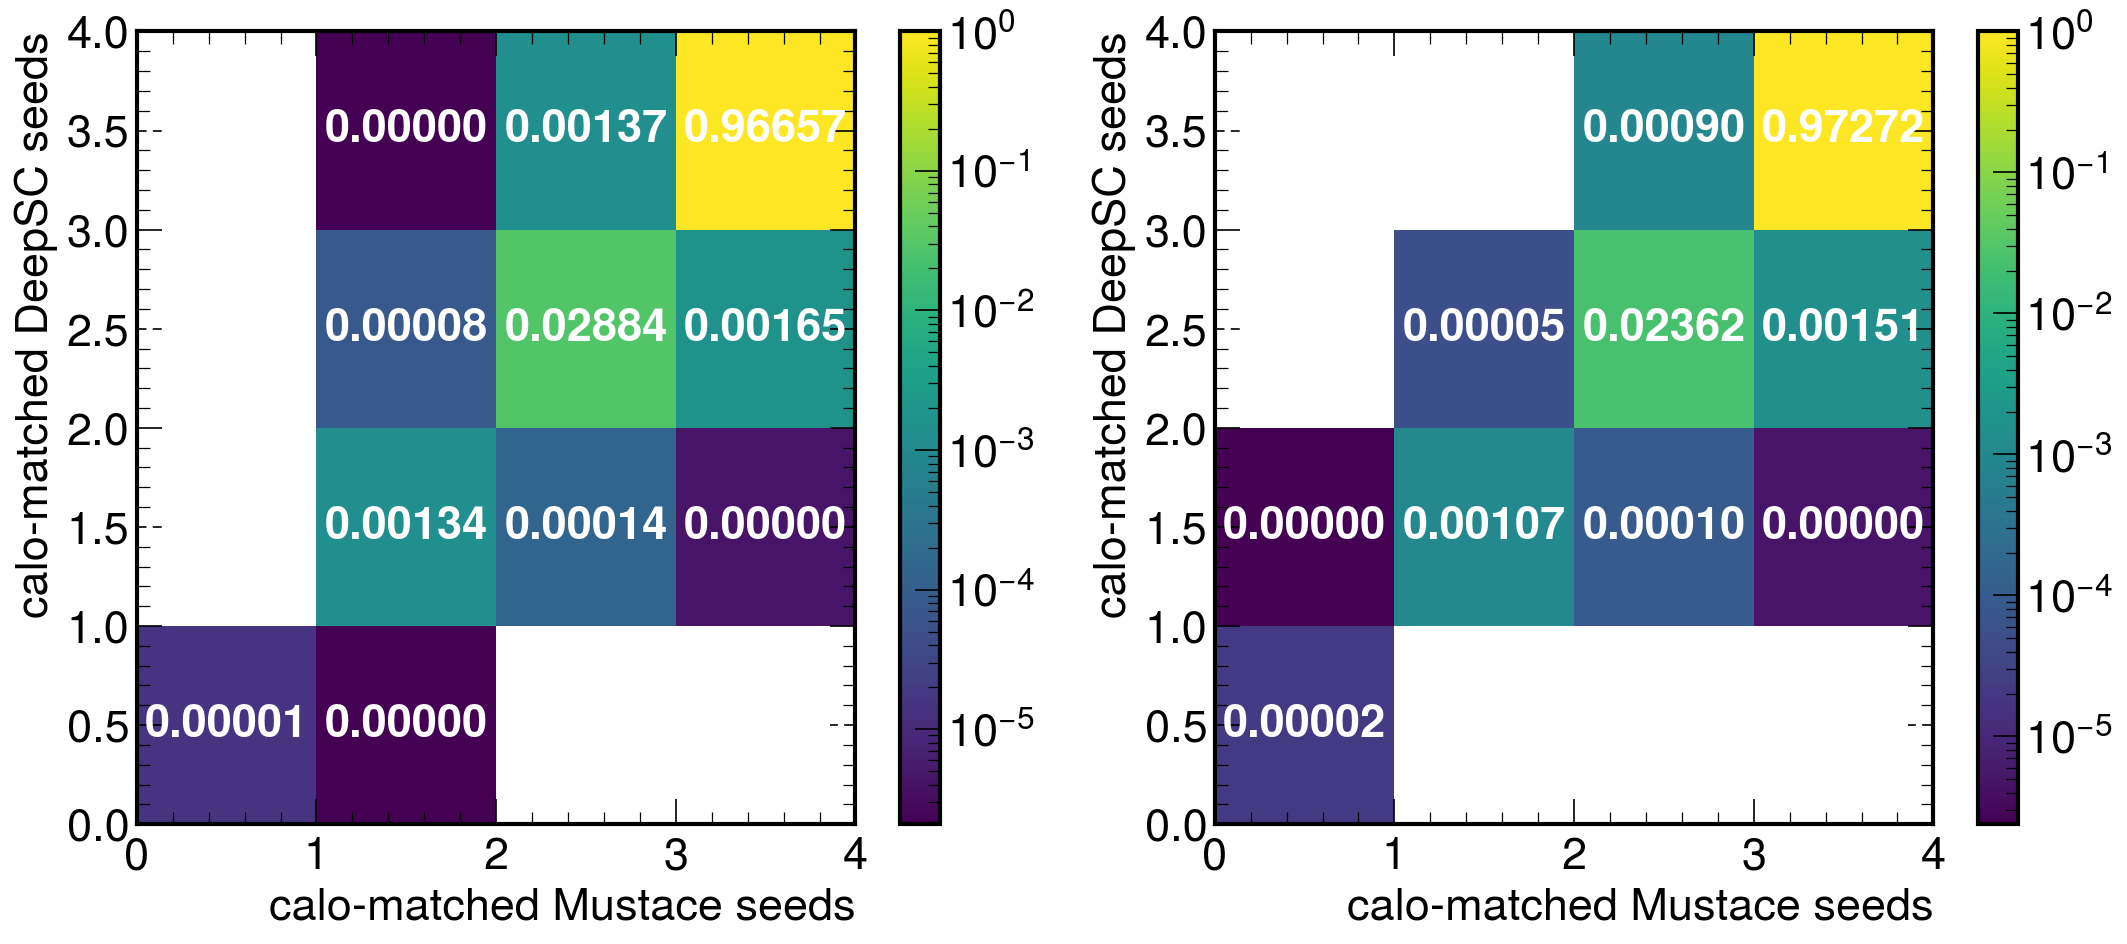

In [6]:
fig,ax = plt.subplots(1,2, figsize=(17,7), dpi=150)

for f, df in enumerate([df_ev_ele, df_ev_gamma]):
    ns
    mask = df.nseeds_calomatched == ns

    hist, xbins, ybins, C = ax[f].hist2d(df[mask].nseeds_calomatched_must, df[mask].nseeds_calomatched_deepsc, bins=(ns,ns), range=((0,ns),(0,ns)),
                  norm=colors.LogNorm(vmax=1), density=True)

    for i in range(len(ybins)-1):
        for j in range(len(xbins)-1):
            ax[f].text(xbins[j]+0.5,ybins[i]+0.5, "{:.5f}".format(hist.T[i,j]), 
                    color="w", ha="center", va="center", fontweight="bold", fontsize="small")

    ax[f].set_ylabel("calo-matched DeepSC seeds", fontsize="small")
    ax[f].set_xlabel("calo-matched Mustace seeds", fontsize="small")

    fig.colorbar(C, ax=ax[f])
    
fig.savefig(output_folder + "/confusion_matrix_calomatched.png")
fig.savefig(output_folder + "/confusion_matrix_calomatched.pdf")

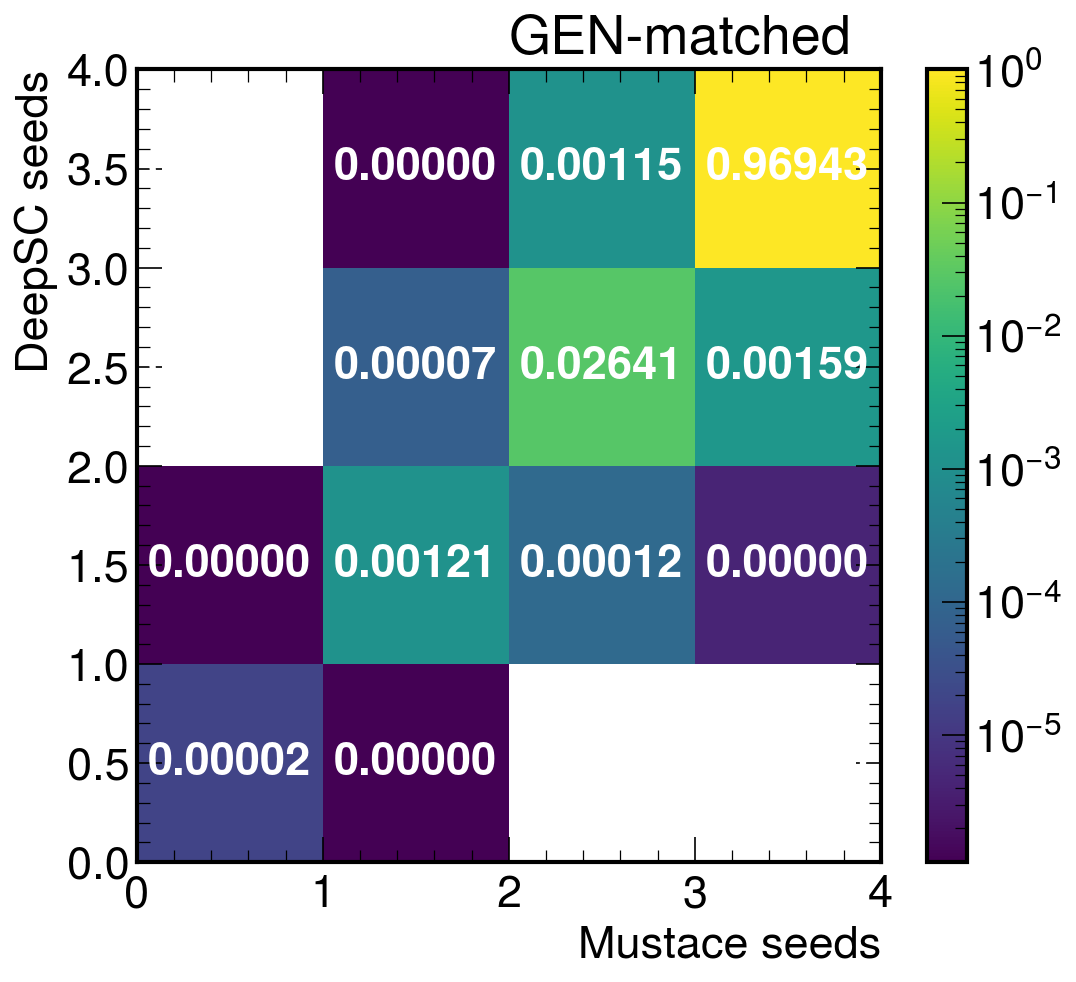

In [157]:
fig,ax = plt.subplots(1,1, figsize=(8,7), dpi=150)

df = df_ev_all
ns = 4
mask = df.nseeds_calomatched == ns

hist, xbins, ybins, C = ax.hist2d(df[mask].nseeds_calomatched_must, df[mask].nseeds_calomatched_deepsc, bins=(ns,ns), range=((0,ns),(0,ns)),
              norm=colors.LogNorm(vmax=1), density=True)

for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        ax.text(xbins[j]+0.5,ybins[i]+0.5, "{:.5f}".format(hist.T[i,j]), 
                color="w", ha="center", va="center", fontweight="bold", fontsize="small")

ax.set_ylabel("DeepSC seeds", fontsize="small")
ax.set_xlabel("Mustace seeds", fontsize="small")

ax.text(0.5, 1.02, "GEN-matched", transform=ax.transAxes)

fig.colorbar(C, ax=ax)

fig.savefig(output_folder + "/confusion_matrix_calomatched.png")
fig.savefig(output_folder + "/confusion_matrix_calomatched.pdf")

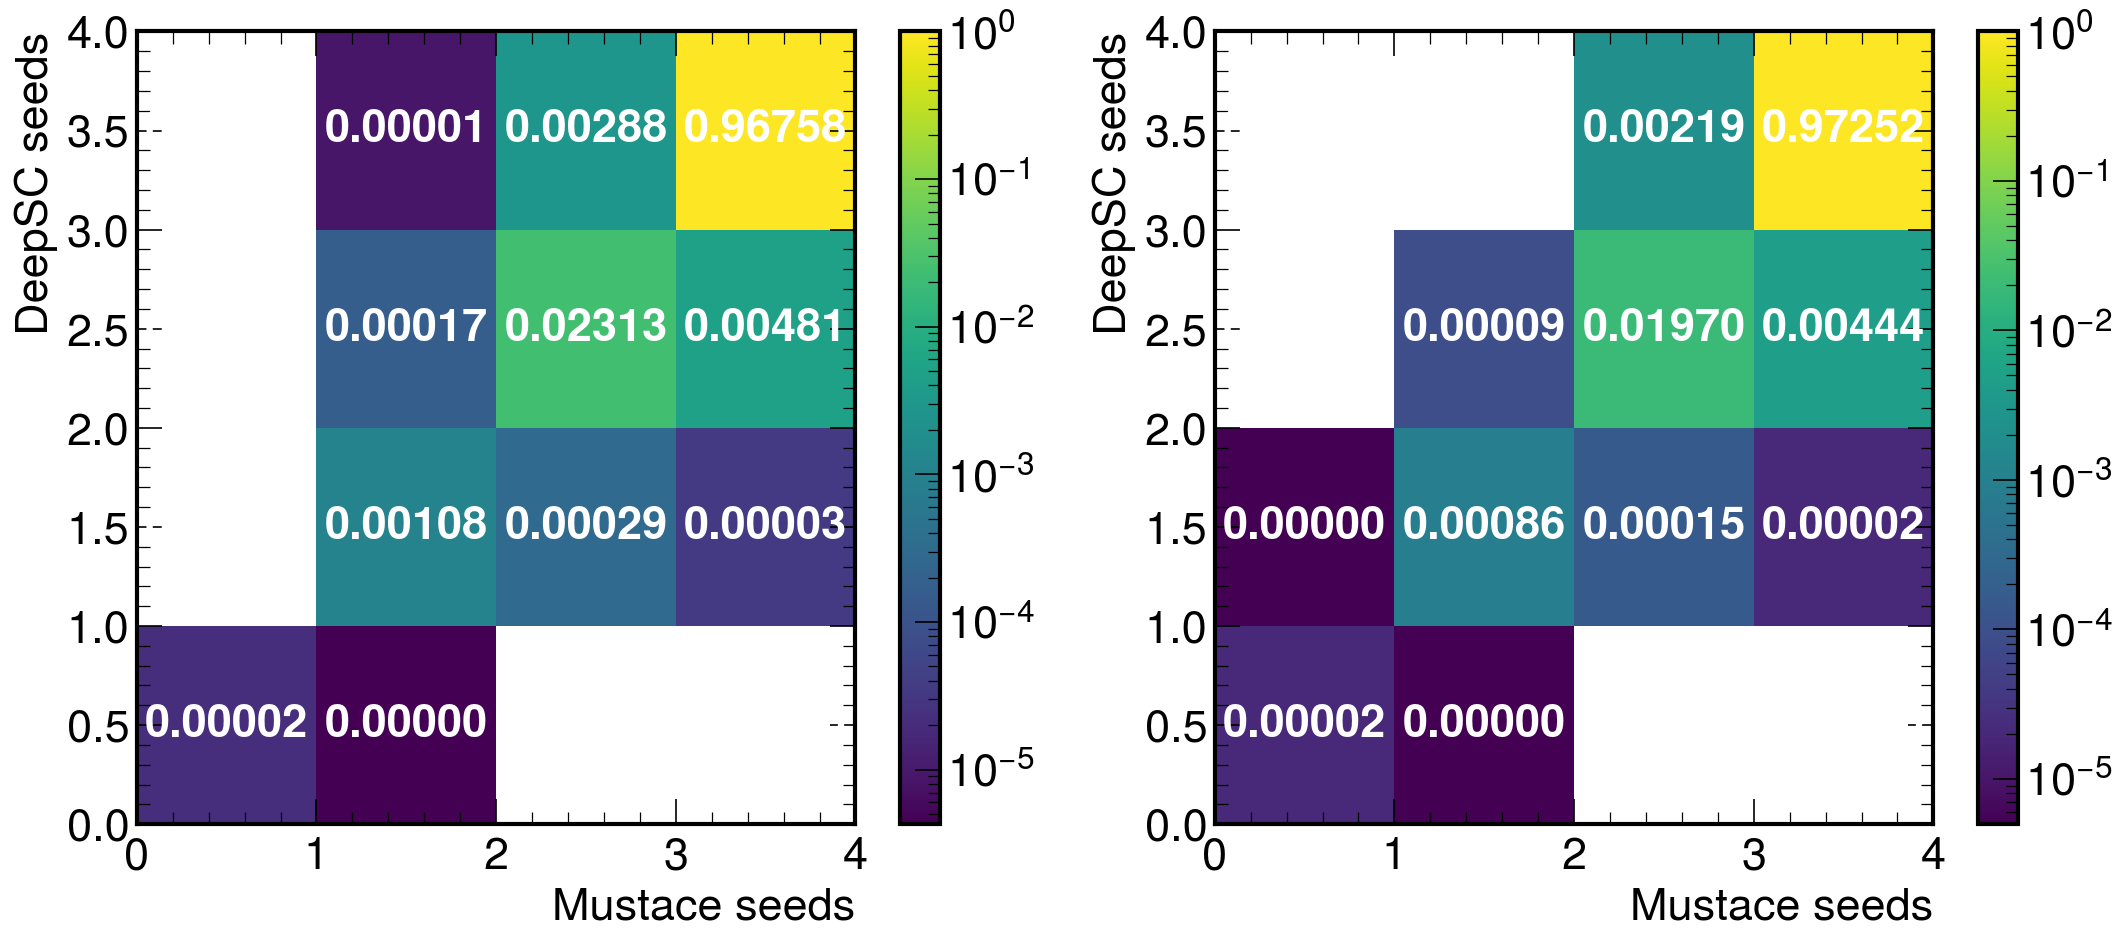

In [8]:
fig,ax = plt.subplots(1,2, figsize=(17,7), dpi=150)

for f, df in enumerate([df_ev_ele, df_ev_gamma]):

    mask = df.nseeds_calomatched == 4
    ns =4

    hist, xbins, ybins, C = ax[f].hist2d(df[mask].nseeds_must, df[mask].nseeds_deepsc, bins=(ns,ns), range=((0,ns),(0,ns)),
                  norm=colors.LogNorm(vmax=1), density=True, cmap="viridis")

    for i in range(len(ybins)-1):
        for j in range(len(xbins)-1):
            ax[f].text(xbins[j]+0.5,ybins[i]+0.5, "{:.5f}".format(hist.T[i,j]), 
                    color="w", ha="center", va="center", fontweight="bold", fontsize="small")

    ax[f].set_ylabel("DeepSC seeds", fontsize="small")
    ax[f].set_xlabel("Mustace seeds", fontsize="small")

    fig.colorbar(C, ax=ax[f])
    
fig.savefig(output_folder + "/confusion_matrix.png")
fig.savefig(output_folder + "/confusion_matrix.pdf")

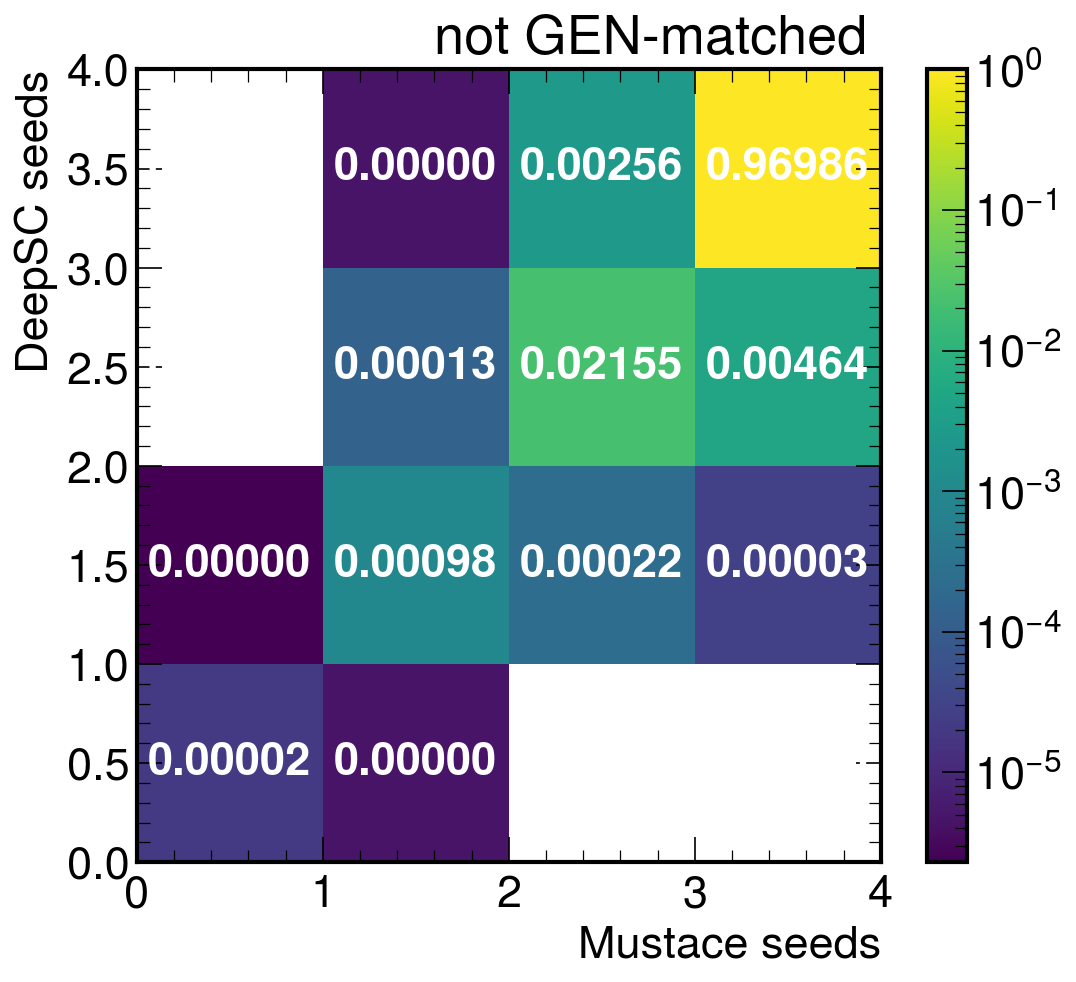

In [159]:
fig,ax = plt.subplots(1,1, figsize=(8,7), dpi=150)

df = df_ev_all
ns = 4
mask = df.nseeds_calomatched == ns

hist, xbins, ybins, C = ax.hist2d(df[mask].nseeds_must, df[mask].nseeds_deepsc, bins=(ns,ns), range=((0,ns),(0,ns)),
              norm=colors.LogNorm(vmax=1), density=True)

for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        ax.text(xbins[j]+0.5,ybins[i]+0.5, "{:.5f}".format(hist.T[i,j]), 
                color="w", ha="center", va="center", fontweight="bold", fontsize="small")

ax.set_ylabel("DeepSC seeds", fontsize="small")
ax.set_xlabel("Mustace seeds", fontsize="small")

ax.text(0.4, 1.02, "not GEN-matched", transform=ax.transAxes)

fig.colorbar(C, ax=ax)

fig.savefig(output_folder + "/confusion_matrix_calomatched.png")
fig.savefig(output_folder + "/confusion_matrix_calomatched.pdf")

In [94]:
ns =100
hist, xbins, ybins, C = ax[f].hist2d(df.ncls_tot_must, df.ncls_tot_deepsc, bins=(ns,ns), range=((0,ns),(0,ns)),
                  norm=colors.LogNorm(vmax=1), density=True)

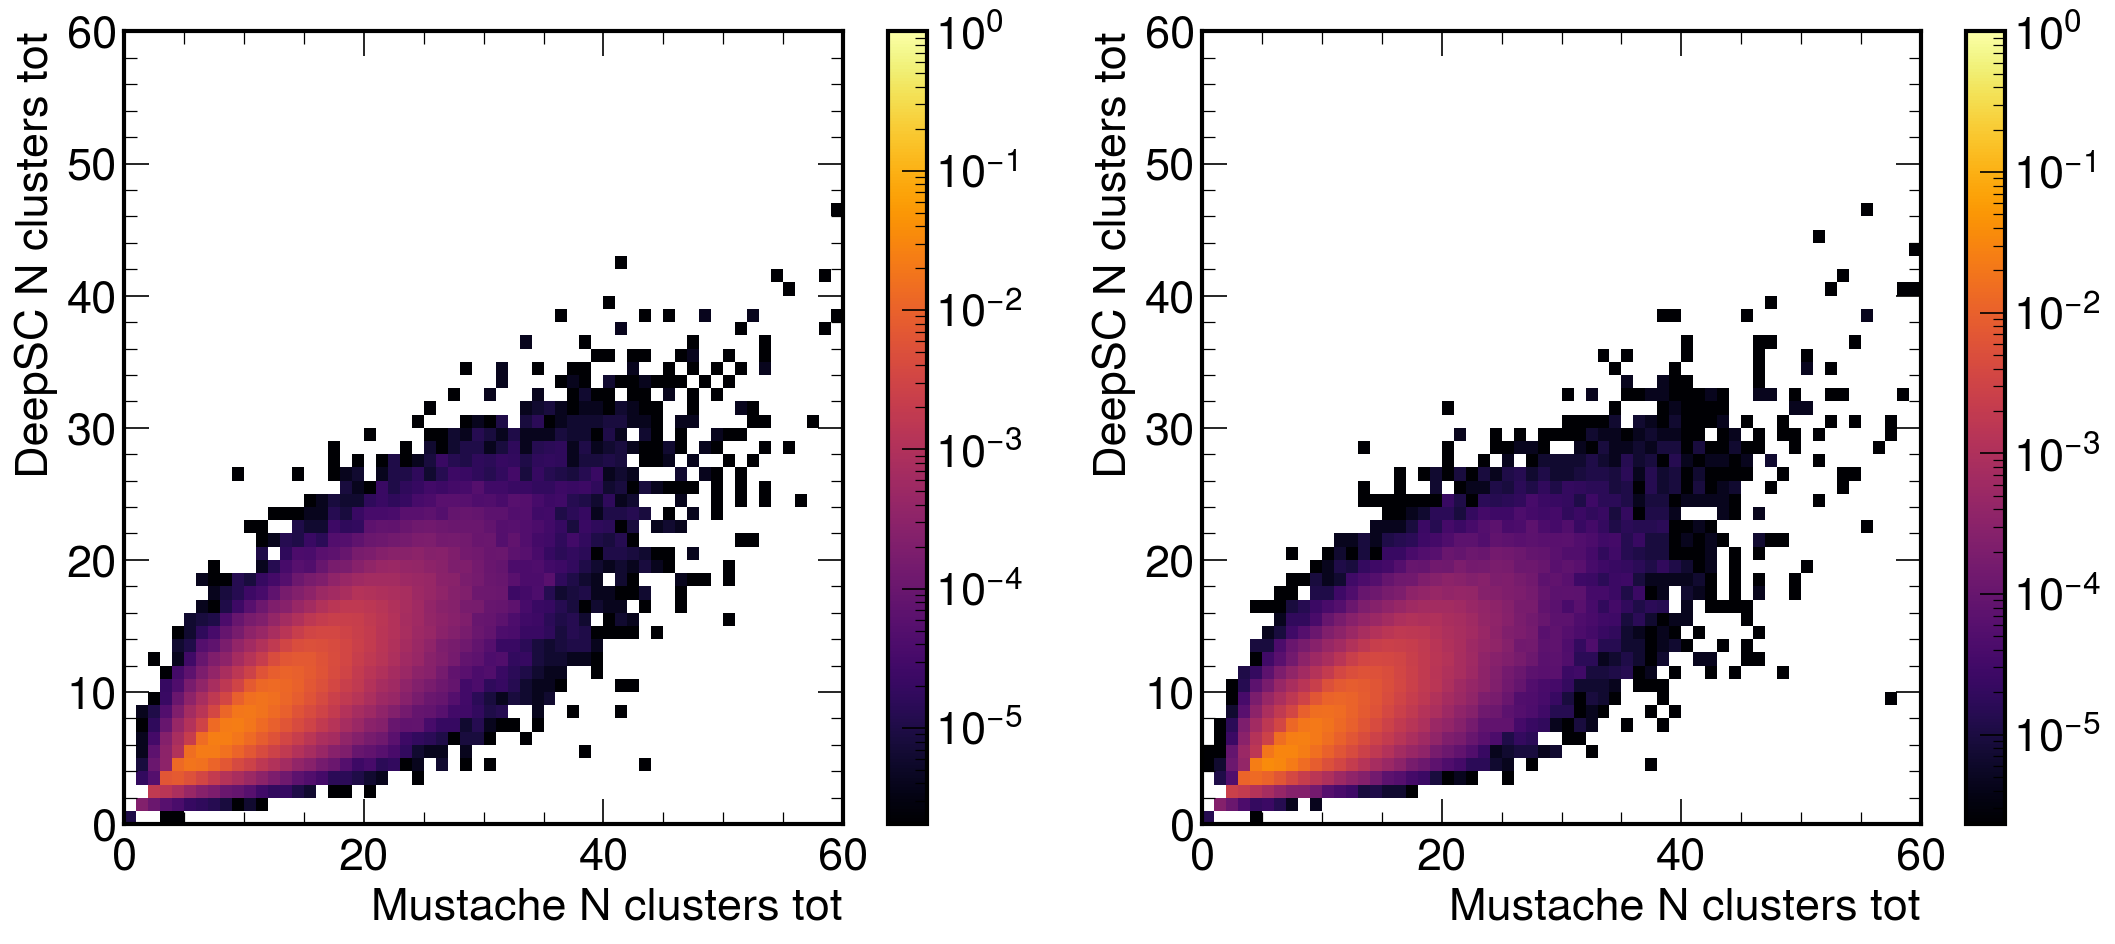

In [24]:
fig,ax = plt.subplots(1,2, figsize=(17,7), dpi=150)

for f, df in enumerate([df_ev_ele, df_ev_gamma]):

    ns = 60

    hist, xbins, ybins, C = ax[f].hist2d(df.ncls_tot_must, df.ncls_tot_deepsc, bins=(ns,ns), range=((0,ns),(0,ns)),
                  norm=colors.LogNorm(vmax=1), density=True, cmap="inferno")

    ax[f].set_ylabel("DeepSC N clusters tot", fontsize="small")
    ax[f].set_xlabel("Mustache N clusters tot", fontsize="small")

    fig.colorbar(C, ax=ax[f])
    
fig.savefig(output_folder + "/ncls_tot.png")
fig.savefig(output_folder + "/ncls_tot.pdf")

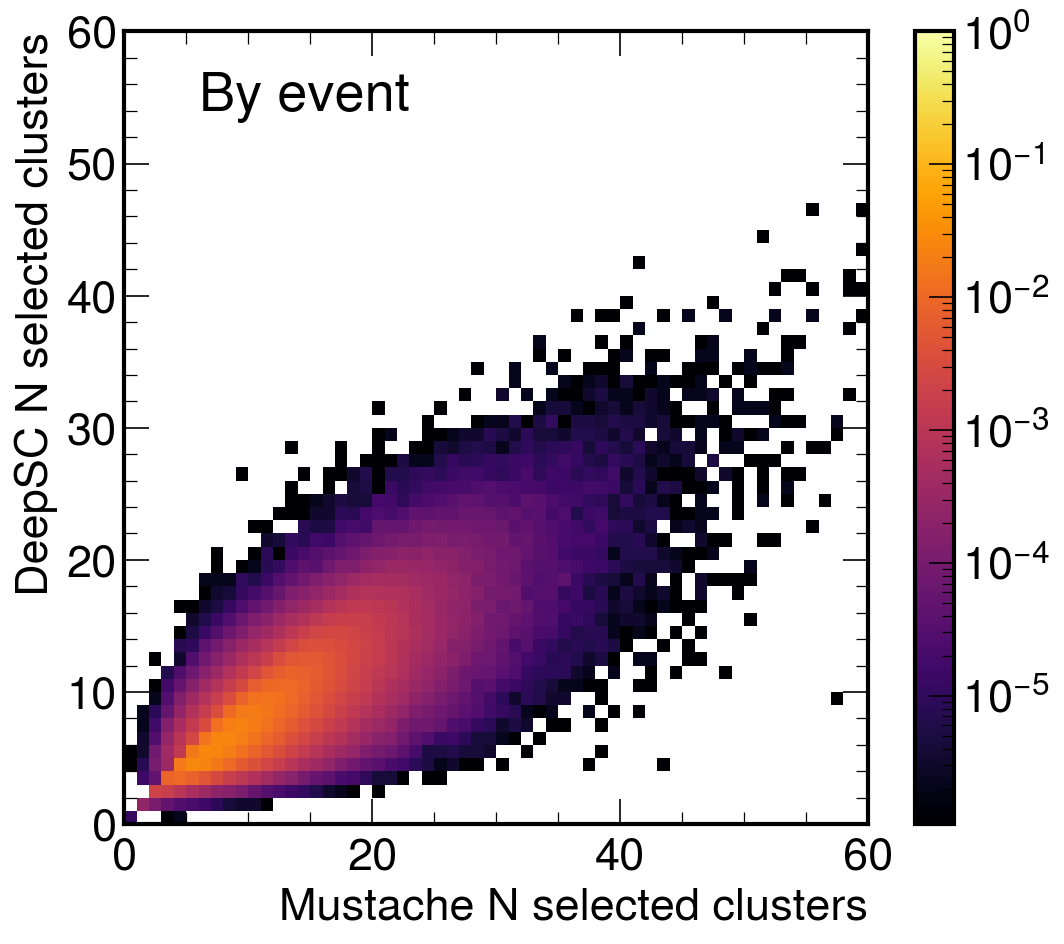

In [150]:
fig,ax = plt.subplots(1,1, figsize=(8,7), dpi=150)
df = df_ev_all
ns = 60

hist, xbins, ybins, C = ax.hist2d(df.ncls_tot_must, df.ncls_tot_deepsc, bins=(ns,ns), range=((0,ns),(0,ns)),
              norm=colors.LogNorm(vmax=1), density=True, cmap="inferno")

ax.set_ylabel("DeepSC N selected clusters", fontsize="small")
ax.set_xlabel("Mustache N selected clusters", fontsize="small")

ax.text(0.1, 0.9, "By event", transform=ax.transAxes)


fig.colorbar(C, ax=ax)
    
fig.savefig(output_folder + "/ncls_tot_elegamma.png")
fig.savefig(output_folder + "/ncls_tot_elegamma.pdf")

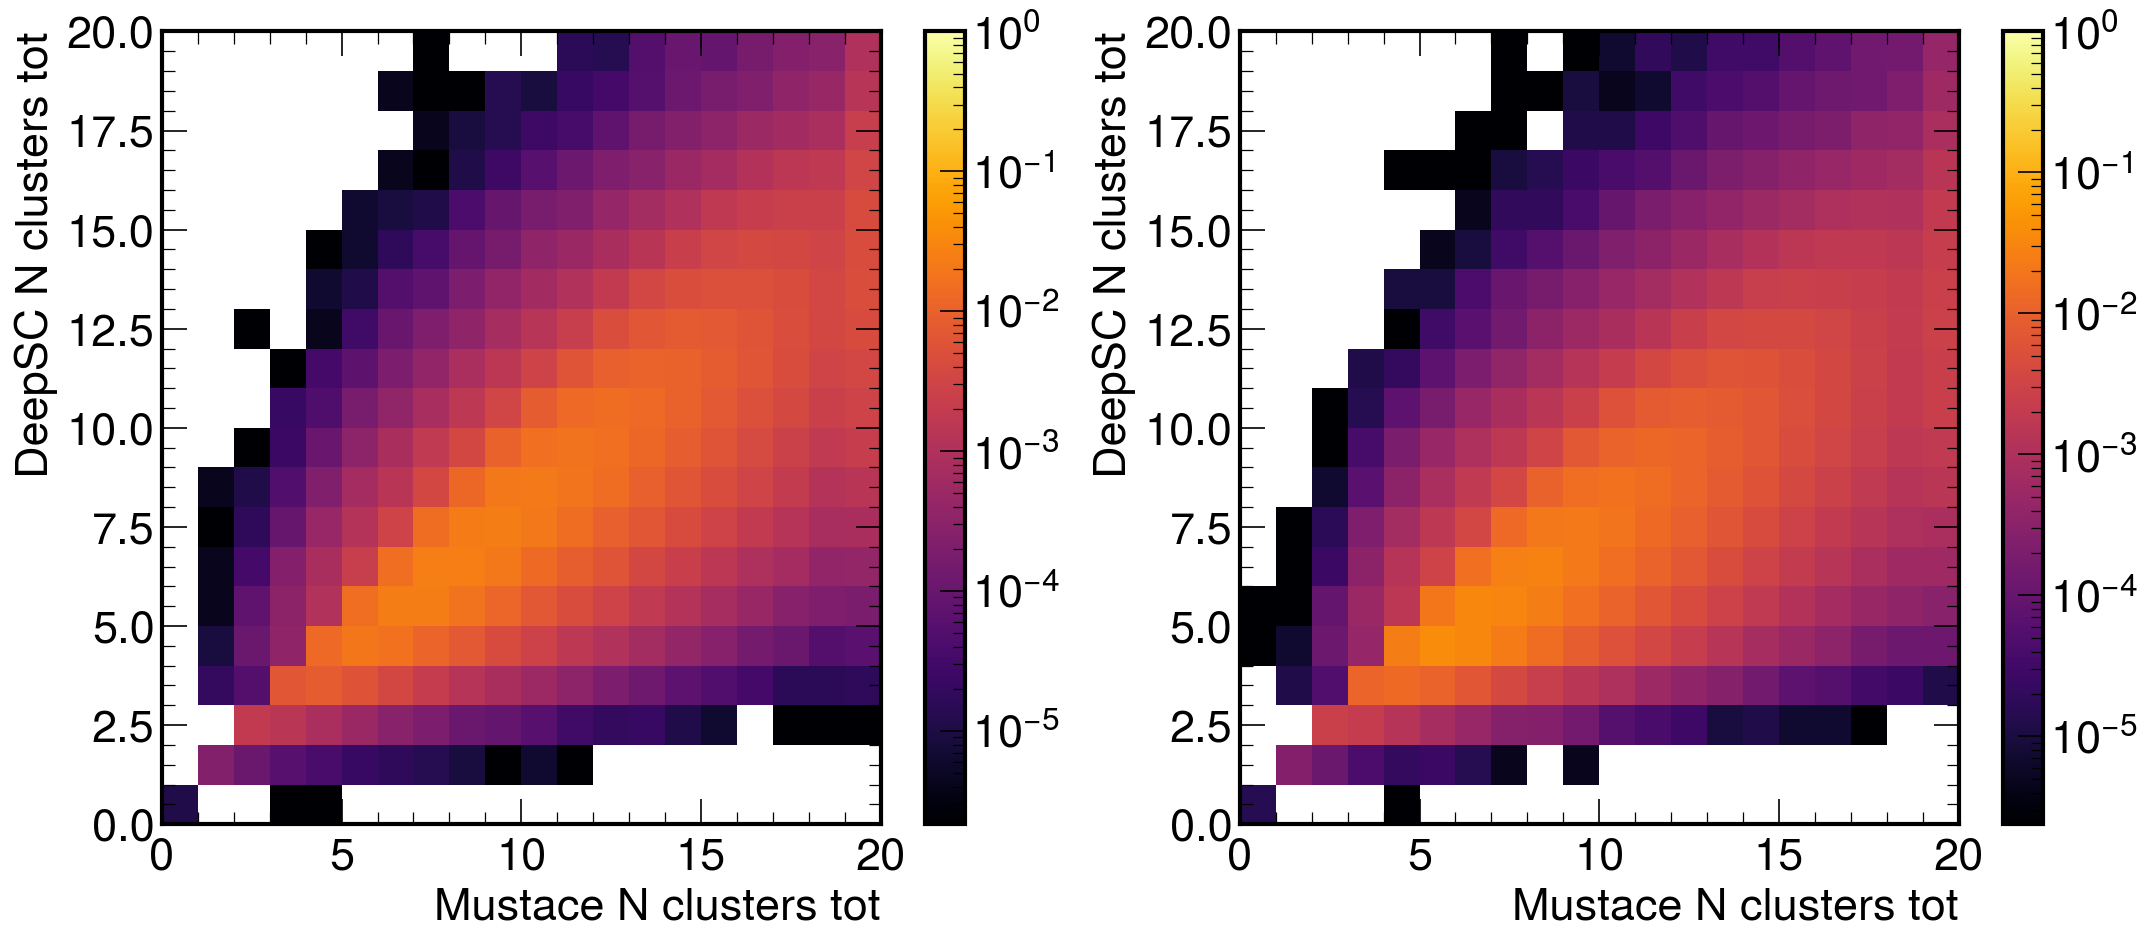

In [110]:
fig,ax = plt.subplots(1,2, figsize=(17,7), dpi=150)

for f, df in enumerate([df_ev_ele, df_ev_gamma]):

    ns = 20

    hist, xbins, ybins, C = ax[f].hist2d(df.ncls_tot_must, df.ncls_tot_deepsc, bins=(ns,ns), range=((0,ns),(0,ns)),
                  norm=colors.LogNorm(vmax=1), density=True, cmap="inferno")

    ax[f].set_ylabel("DeepSC N clusters tot", fontsize="small")
    ax[f].set_xlabel("Mustace N clusters tot", fontsize="small")

    fig.colorbar(C, ax=ax[f])

In [89]:
df_ev_ele.columns

Index(['output_event.csv', 'ncls_tot_deepsc', 'ncls_tot_must',
       'nseeds_calomatched', 'nseeds_calomatched_deepsc',
       'nseeds_calomatched_must', 'nseeds_deepsc', 'nseeds_must',
       'nseeds_nocalomatched', 'seeds_calomatched_deepsc',
       'seeds_calomatched_must', 'seeds_deepsc', 'seeds_must'],
      dtype='object')

# Analysis of seed by seed info

In [25]:
df_ele = pd.HDFStore("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/reco_comparison/electrons/ele_UL18_123X_algoA_v2_seed.h5py", "r")["df"]
df_gamma = pd.HDFStore("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/reco_comparison/gammas/gamma_UL18_123X_algoA_v2_seed.h5py", "r")["df"]

In [141]:
df_all = pd.concat([df_ele, df_gamma])

In [122]:
df_ele.columns

Index(['output_seeds.csv', 'calo_en_true_sim', 'calo_et_true_gen',
       'calo_et_true_sim', 'calo_geneta', 'calo_genphi', 'calo_simeta',
       'calo_simphi', 'calomatched', 'cls_deepsc', 'cls_must',
       'en_deepsc_calib', 'en_deepsc_raw', 'en_mustache_calib',
       'en_mustache_raw', 'en_seed', 'en_seed_calib', 'et_deepsc_calib',
       'et_deepsc_raw', 'et_mustache_calib', 'et_mustache_raw', 'et_seed',
       'et_seed_calib', 'event_tot_simen_PU', 'in_deepsc', 'in_mustache',
       'nVtx', 'ncls_deepsc', 'ncls_mustache', 'ncls_tot', 'ncls_true',
       'obsPU', 'rho', 'seed_eta', 'seed_iz', 'seed_phi', 'truePU'],
      dtype='object')

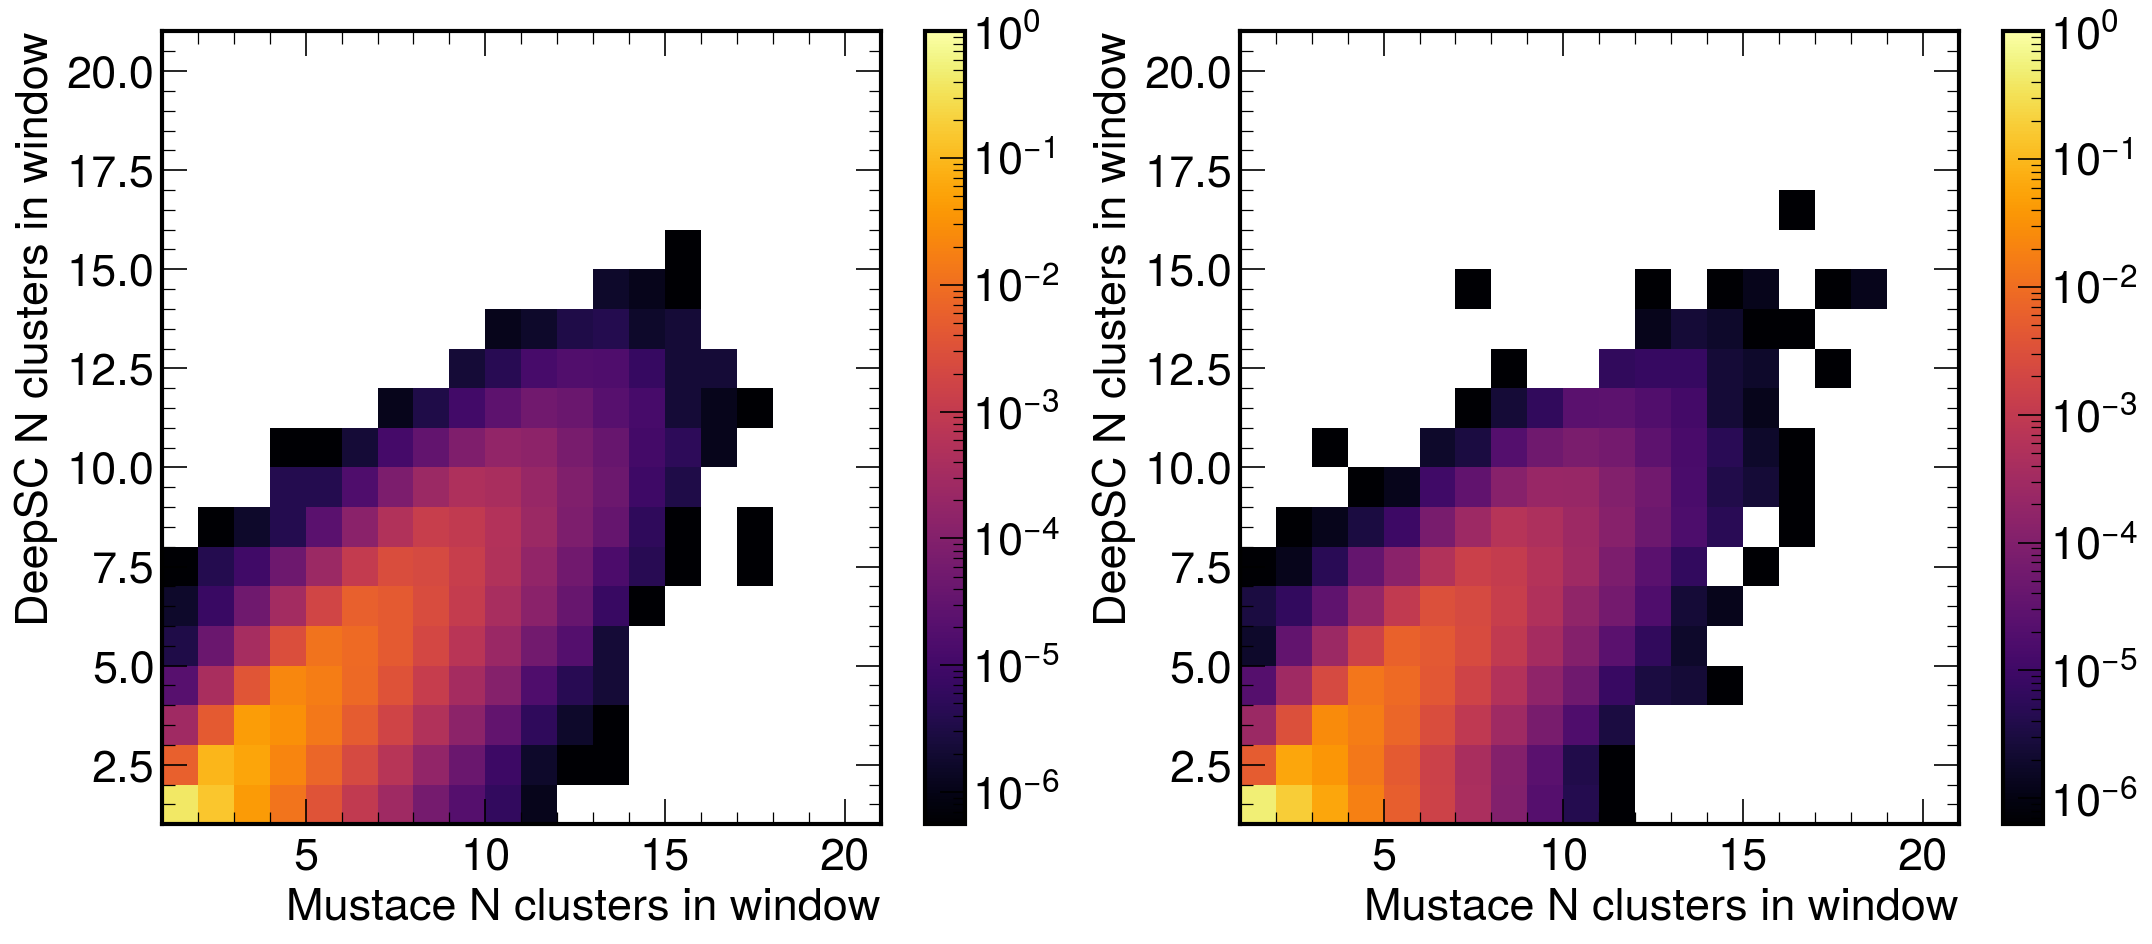

In [37]:
fig,ax = plt.subplots(1,2, figsize=(17,7), dpi=150)

for f, df in enumerate([df_ele, df_gamma]):

    ns = 20
    
    mask = (df.in_deepsc ==1) & (df.in_mustache==1) & (df.calomatched ==1)

    hist, xbins, ybins, C = ax[f].hist2d(df[mask].ncls_mustache, df[mask].ncls_deepsc, bins=(ns,ns), range=((1,ns+1),(1,ns+1)),
                  norm=colors.LogNorm(vmax=1), density=True, cmap="inferno")

    ax[f].set_ylabel("DeepSC N clusters in window", fontsize="small")
    ax[f].set_xlabel("Mustace N clusters in window", fontsize="small")

    fig.colorbar(C, ax=ax[f])
    
fig.savefig(output_folder + "/ncls_inwindow.png")
fig.savefig(output_folder + "/ncls_inwindow.pdf")

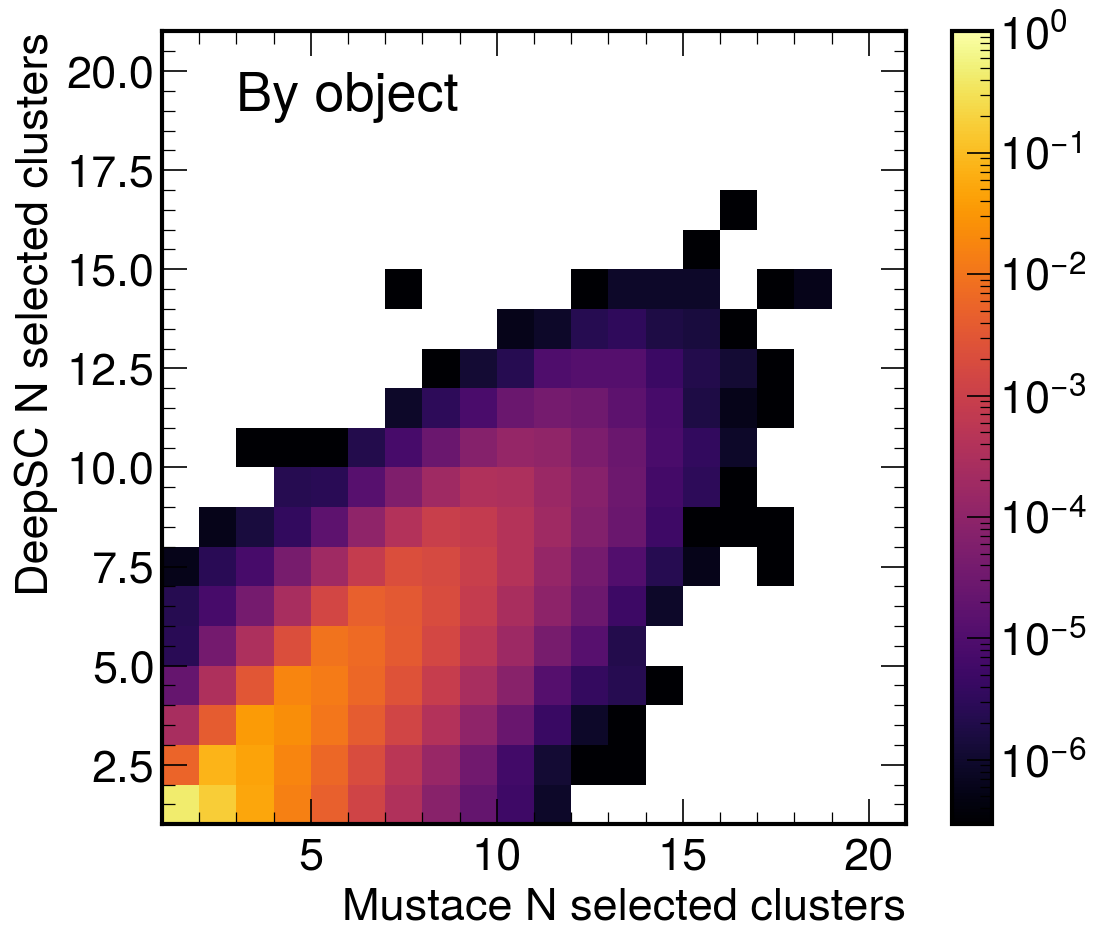

In [149]:
fig,ax = plt.subplots(1,1, figsize=(8,7), dpi=150)

df = df_all
ns = 20

mask = (df.in_deepsc ==1) & (df.in_mustache==1) & (df.calomatched ==1)

hist, xbins, ybins, C = ax.hist2d(df[mask].ncls_mustache, df[mask].ncls_deepsc, bins=(ns,ns), range=((1,ns+1),(1,ns+1)),
              norm=colors.LogNorm(vmax=1), density=True, cmap="inferno")

ax.set_ylabel("DeepSC N selected clusters", fontsize="small")
ax.set_xlabel("Mustace N selected clusters", fontsize="small")

ax.text(0.1, 0.9, "By object", transform=ax.transAxes)

fig.colorbar(C, ax=ax)
    
fig.savefig(output_folder + "/ncls_inwindow_elegamma.png")
fig.savefig(output_folder + "/ncls_inwindow_elegamma.pdf")

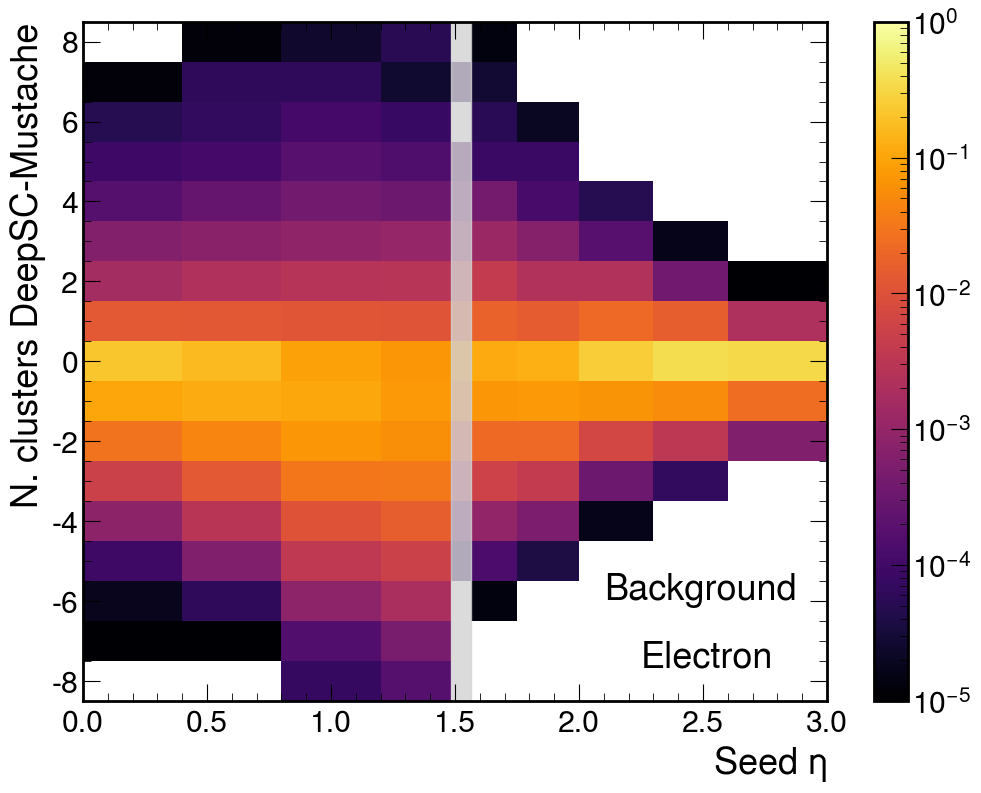

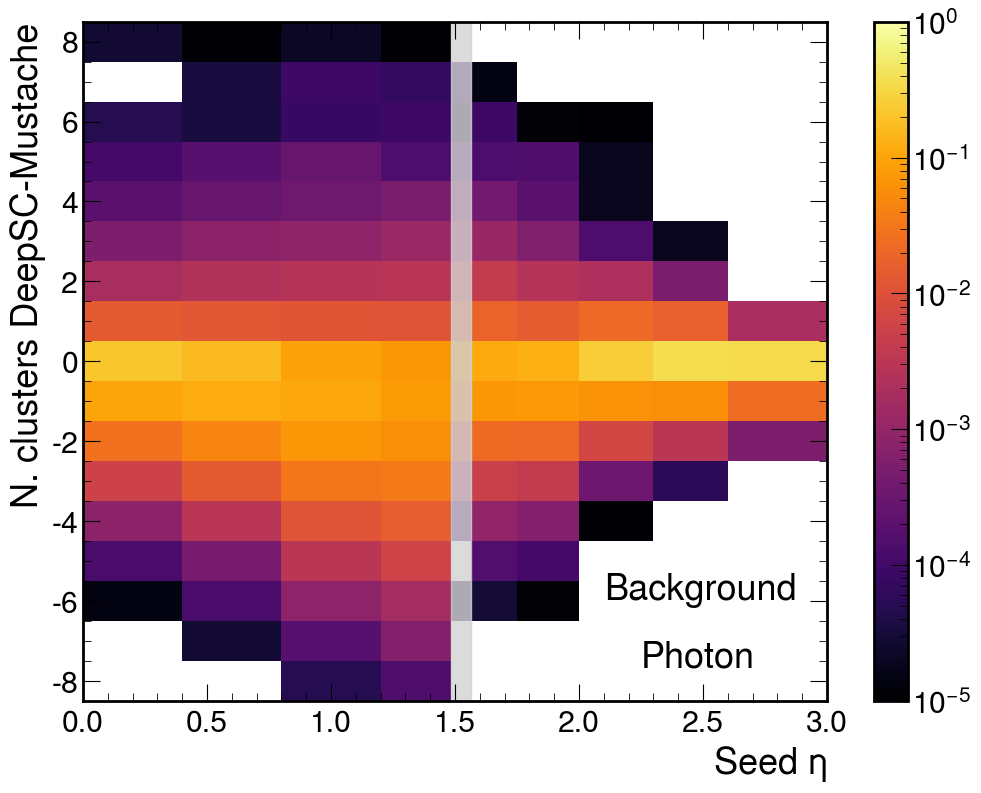

In [117]:
etas =  [0, 0.4,0.8, 1.2,1.485, 1.566, 1.75,2.,2.3,2.6,3]
xbins = [-8.5, -7.5, -6.5,-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5, 1.5 ,2.5 ,3.5, 4.5 ,5.5,6.5,7.5,8.5]

for df, flavour in zip([df_ele, df_gamma],["Electron", "Photon"]):
    mask = (df.in_deepsc == 1) & (df.in_mustache==1) & (df.calomatched != 1)

    fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)
    A  = ax.hist2d(abs(df[mask].seed_eta), df[mask].ncls_deepsc - df[mask].ncls_mustache, bins=(etas, xbins ), cmap="inferno",
                   density=True, norm=colors.LogNorm(vmax=1, vmin=1e-5) )
    
    ax.fill_between([1.485, 1.566], [-8.5,-8.5],[8.5,8.5], color="lightgray", alpha=0.8)

    fig.colorbar(A[3], ax=ax)   
    ax.set_ylabel("N. clusters DeepSC-Mustache")
    ax.set_xlabel("Seed $\eta$")
    ax.text(0.7, 0.15, "Background", transform=ax.transAxes)
    ax.text(0.75, 0.05, flavour, transform=ax.transAxes)


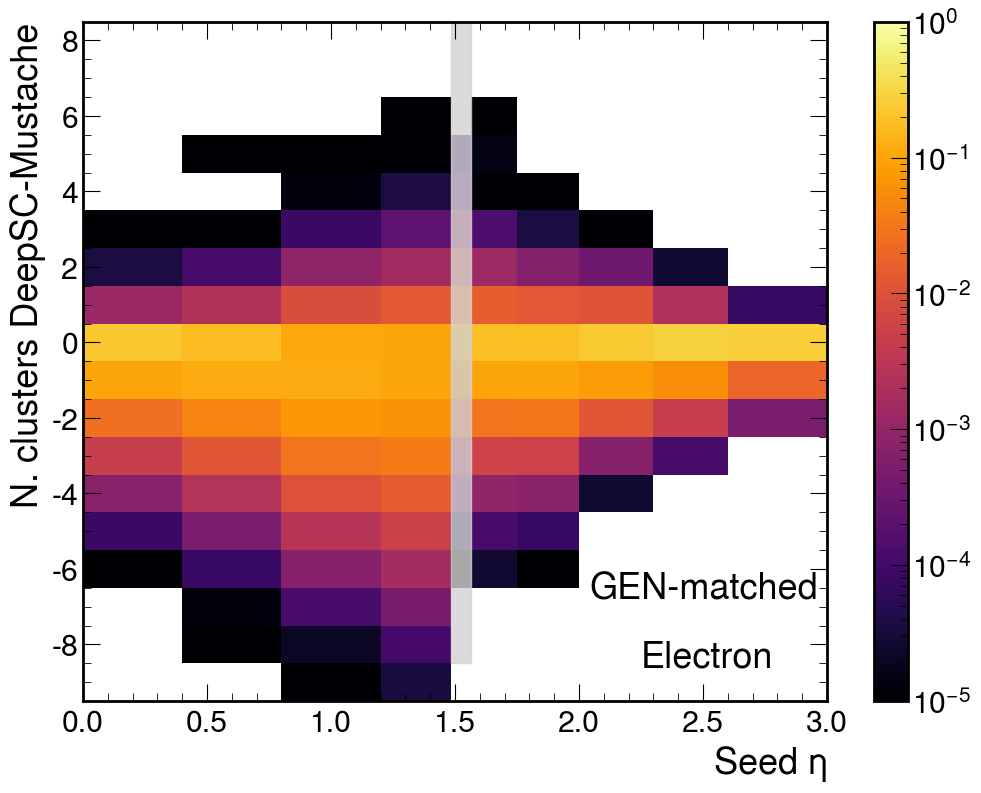

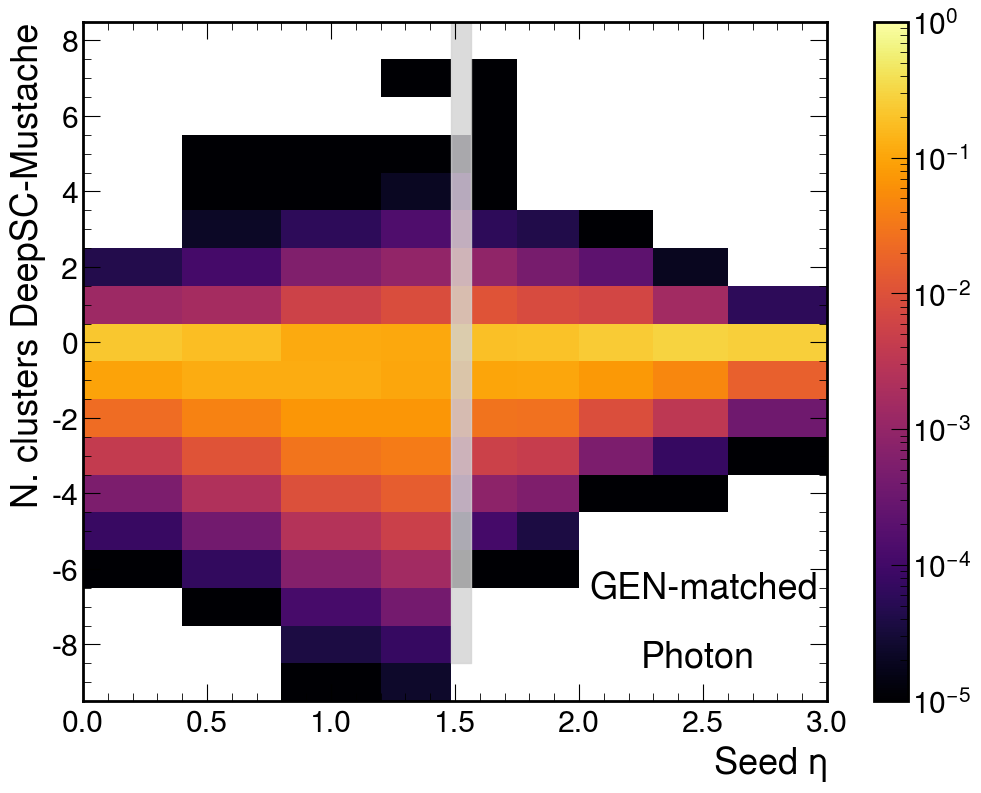

In [220]:
etas =  [0, 0.4,0.8, 1.2,1.485, 1.566, 1.75,2.,2.3,2.6,3]
xbins = [-9.5,-8.5, -7.5, -6.5,-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5, 1.5 ,2.5 ,3.5, 4.5 ,5.5,6.5,7.5,8.5]

for df, flavour in zip([df_ele, df_gamma],["Electron", "Photon"]):
    mask = (df.in_deepsc == 1) & (df.in_mustache==1) & (df.calomatched == 1)

    fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)
    A  = ax.hist2d(abs(df[mask].seed_eta), df[mask].ncls_deepsc - df[mask].ncls_mustache, bins=(etas, xbins ), cmap="inferno",
                   density=True, norm=colors.LogNorm(vmax=1, vmin=1e-5) )
    
    ax.fill_between([1.485, 1.566], [-8.5,-8.5],[8.5,8.5], color="lightgray", alpha=0.8)

    fig.colorbar(A[3], ax=ax)   
    ax.set_ylabel("N. clusters DeepSC-Mustache")
    ax.set_xlabel("Seed $\eta$")
    ax.text(0.68, 0.15, "GEN-matched", transform=ax.transAxes)
    ax.text(0.75, 0.05, flavour, transform=ax.transAxes)


Text(0.68, 0.05, 'GEN-matched')

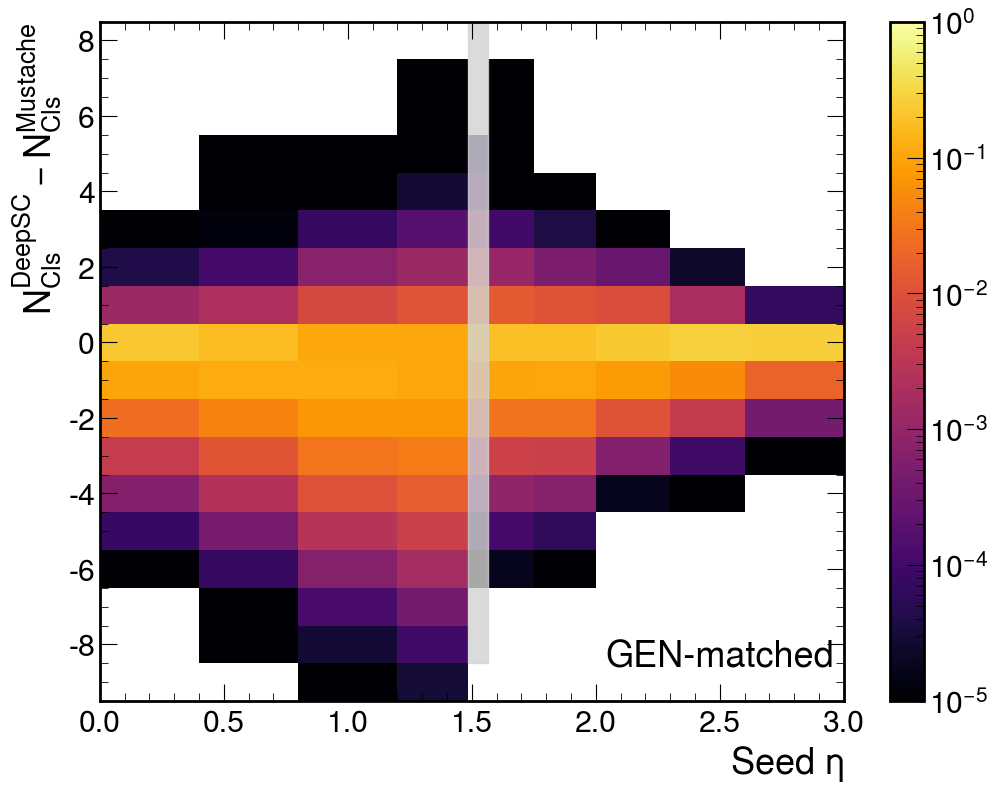

In [154]:
etas =  [0, 0.4,0.8, 1.2,1.485, 1.566, 1.75,2.,2.3,2.6,3]
xbins = [-9.5,-8.5, -7.5, -6.5,-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5, 1.5 ,2.5 ,3.5, 4.5 ,5.5,6.5,7.5,8.5]

df = df_all
mask = (df.in_deepsc == 1) & (df.in_mustache==1) & (df.calomatched == 1)

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)
A  = ax.hist2d(abs(df[mask].seed_eta), df[mask].ncls_deepsc - df[mask].ncls_mustache, bins=(etas, xbins ), cmap="inferno",
               density=True, norm=colors.LogNorm(vmax=1, vmin=1e-5) )

ax.fill_between([1.485, 1.566], [-8.5,-8.5],[8.5,8.5], color="lightgray", alpha=0.8)

fig.colorbar(A[3], ax=ax)   
ax.set_ylabel("$N_{Cls}^{DeepSC} -N_{Cls}^{Mustache}$")
ax.set_xlabel("Seed $\eta$")
ax.text(0.68, 0.05, "SIM-matched", transform=ax.transAxes)


Text(0.68, 0.05, 'Inclusive')

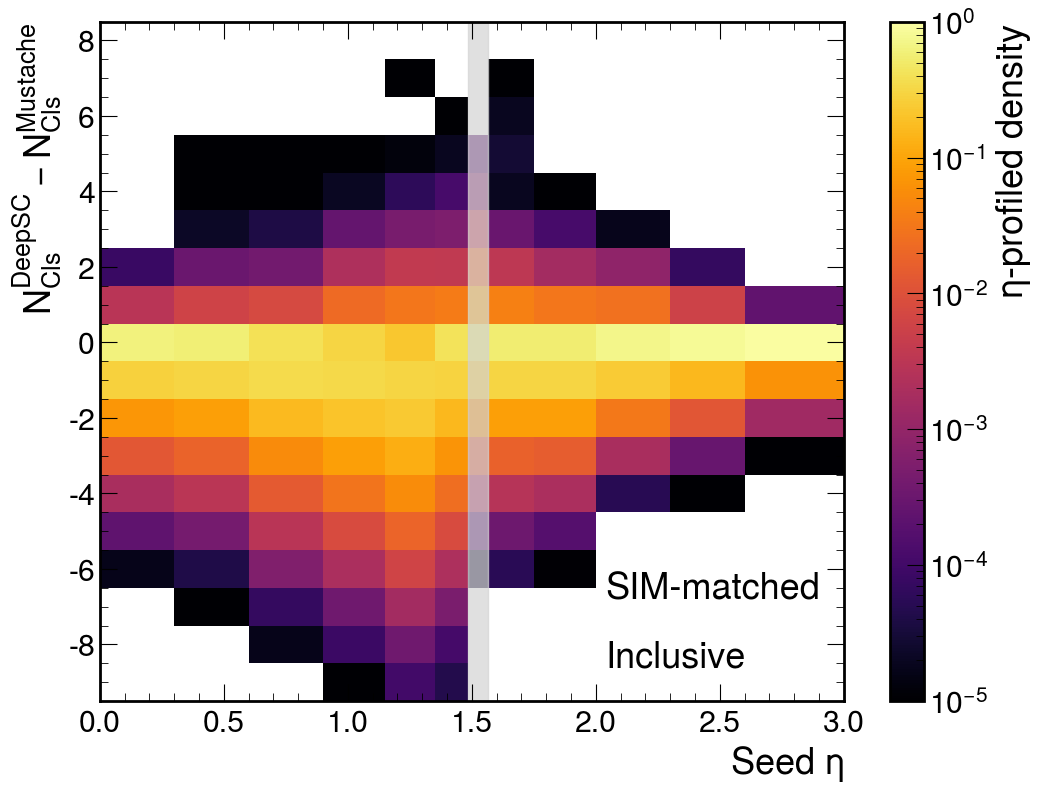

In [272]:
etas =  [0, 0.3,0.6, 0.9, 1.15, 1.35, 1.485, 1.566, 1.75,2.,2.3,2.6,3]
ybins = [-9.5,-8.5, -7.5, -6.5,-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5, 1.5 ,2.5 ,3.5, 4.5 ,5.5,6.5,7.5,8.5]

df = df_all
mask = (df.in_deepsc == 1) & (df.in_mustache==1) & (df.calomatched == 1)

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)
A,xedges,yedges  = np.histogram2d(abs(df[mask].seed_eta), df[mask].ncls_deepsc - df[mask].ncls_mustache, bins=(etas, ybins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

ax.fill_between([1.485, 1.566], [ybins[0], ybins[0]],[ybins[-1],ybins[-1]], color="lightgray", alpha=0.7)

fig.colorbar(I, ax=ax, label="$\eta$-profiled density")   
ax.set_ylabel("$N_{Cls}^{DeepSC} -N_{Cls}^{Mustache}$")
ax.set_xlabel("Seed $\eta$")
ax.text(0.68, 0.15, "SIM-matched", transform=ax.transAxes)
ax.text(0.68, 0.05, "Inclusive", transform=ax.transAxes)


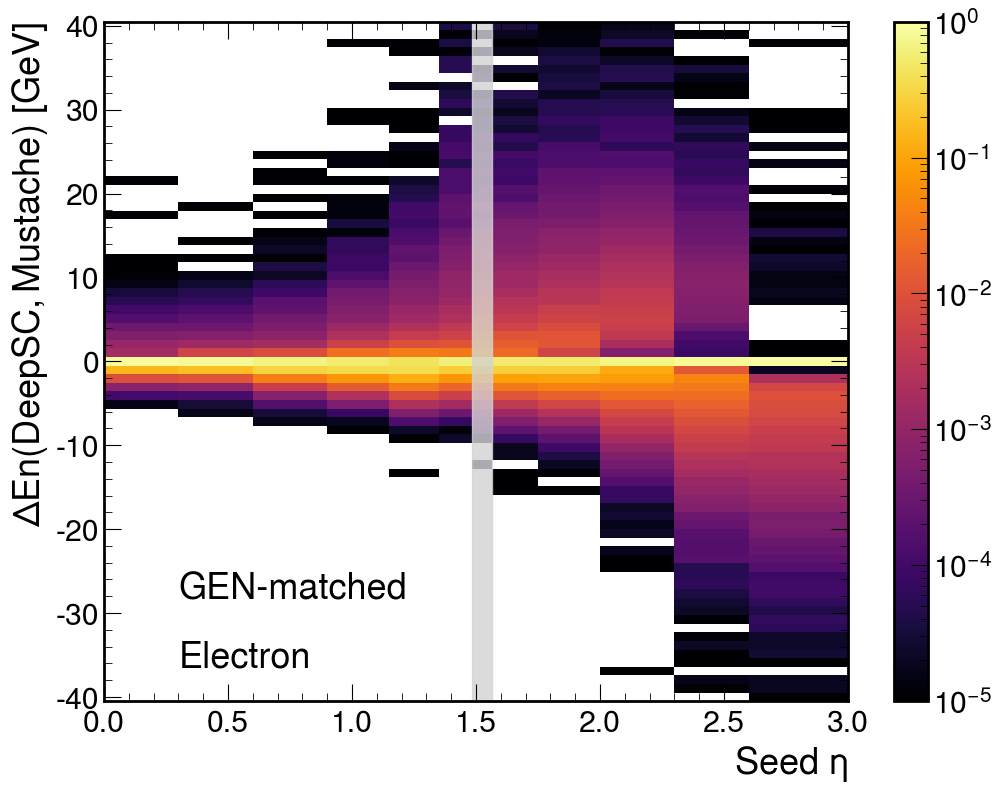

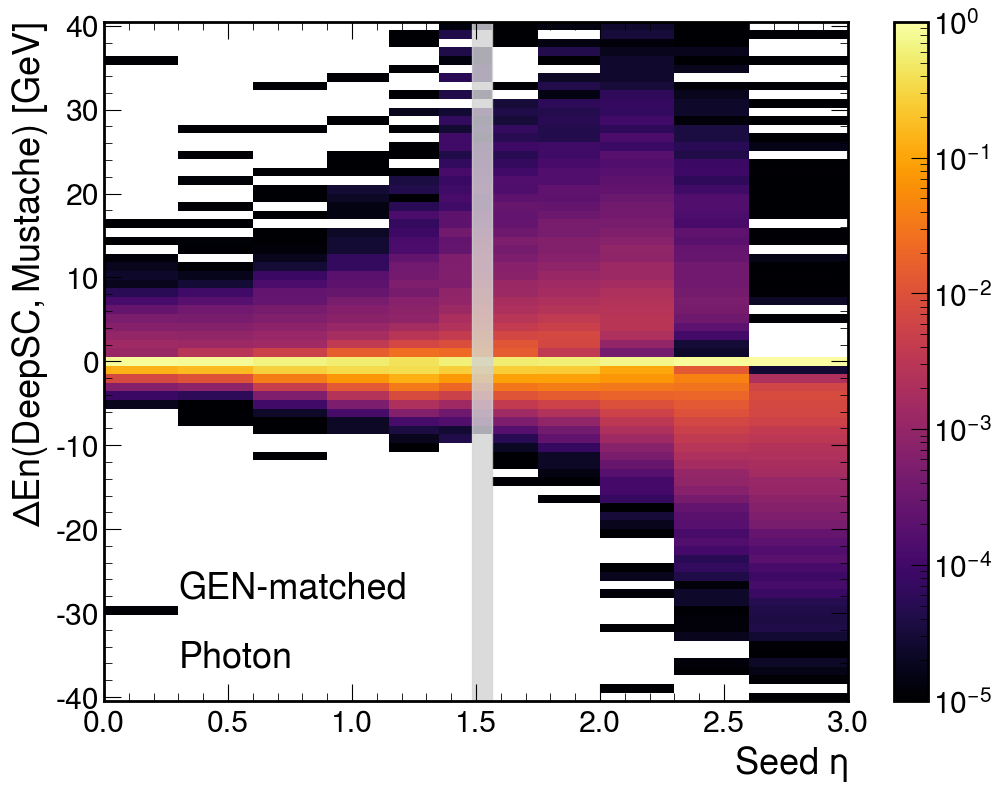

In [269]:
etas =  [0, 0.3,0.6, 0.9, 1.15, 1.35, 1.485, 1.566, 1.75,2.,2.3,2.6,3]
xbins = np.linspace(-40.5,40.5,80)

for df, flavour in zip([df_ele, df_gamma],["Electron", "Photon"]):
    mask = (df.in_deepsc == 1) & (df.in_mustache==1) & (df.calomatched == 1)

    fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)
    
    A,xedges,yedges  = np.histogram2d(abs(df[mask].seed_eta), df[mask].en_deepsc_raw - df[mask].en_mustache_raw, bins=(etas, xbins ))
    s = np.expand_dims(np.sum(A, axis=-1), axis=1)
    a = A/s
    X, Y = np.meshgrid(xedges, yedges)
    I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")
    
    
    ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

    fig.colorbar(I, ax=ax)   
    ax.set_ylabel("$\Delta En (DeepSC, Mustache)$ [GeV]")
    ax.set_xlabel("Seed $\eta$")
    ax.text(0.1, 0.15, "GEN-matched", transform=ax.transAxes)
    ax.text(0.1, 0.05, flavour, transform=ax.transAxes)


Text(0.1, 0.05, 'Inclusive')

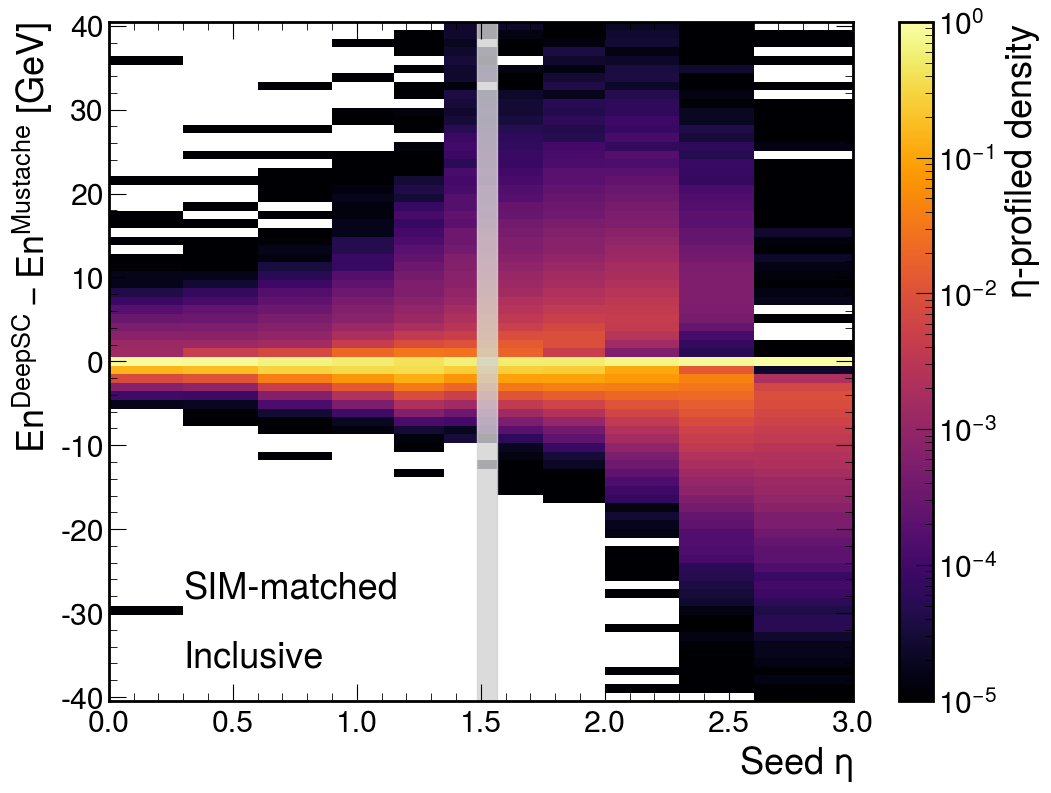

In [275]:
etas =  [0, 0.3,0.6, 0.9, 1.15, 1.35, 1.485, 1.566, 1.75,2.,2.3,2.6,3]
xbins = np.linspace(-40.5,40.5,80)

df = df_all
mask = (df.in_deepsc == 1) & (df.in_mustache==1) & (df.calomatched == 1)

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(abs(df[mask].seed_eta), df[mask].en_deepsc_raw - df[mask].en_mustache_raw, bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="$\eta$-profiled density")   
ax.set_ylabel("$En^{DeepSC} - En^{Mustache}$ [GeV]")
ax.set_xlabel("Seed $\eta$")
ax.text(0.1, 0.15, "SIM-matched", transform=ax.transAxes)
ax.text(0.1, 0.05, "Inclusive", transform=ax.transAxes)


Text(0.5, 0.05, 'Inclusive')

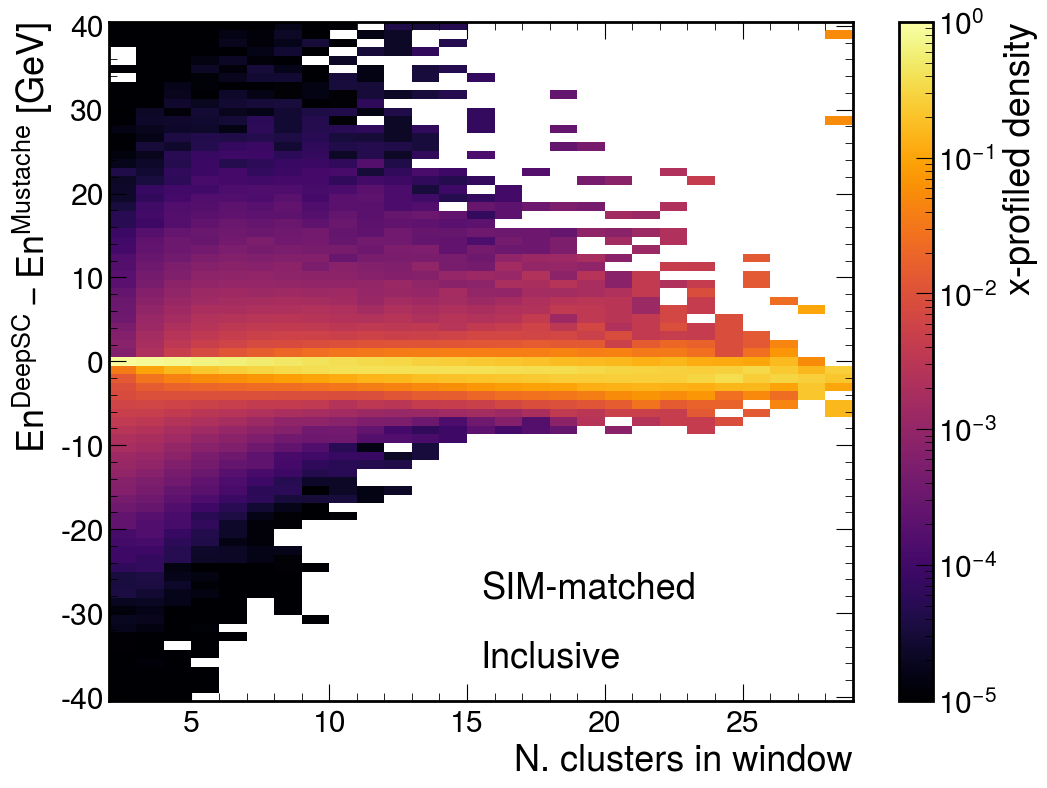

In [283]:
etas =  np.arange(2, 30)
xbins = np.linspace(-40.5,40.5,80)

df = df_all
mask = (df.in_deepsc == 1) & (df.in_mustache==1) & (df.calomatched == 1)

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(df[mask].ncls_tot, df[mask].en_deepsc_raw - df[mask].en_mustache_raw, bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="x-profiled density")   
ax.set_ylabel("$En^{DeepSC} - En^{Mustache}$ [GeV]")
ax.set_xlabel("N. clusters in window")
ax.text(0.5, 0.15, "SIM-matched", transform=ax.transAxes)
ax.text(0.5, 0.05, "Inclusive", transform=ax.transAxes)


Text(0.52, 0.85, 'Inclusive')

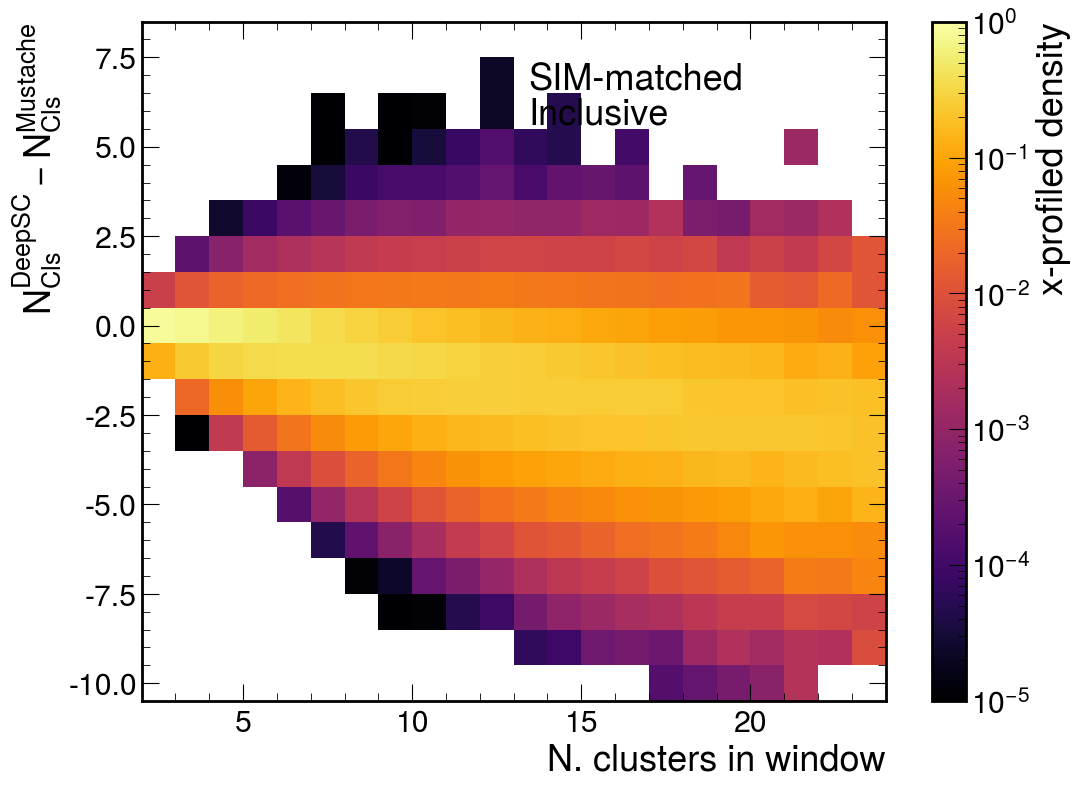

In [294]:
ybins =  [-10.5, -9.5,-8.5, -7.5, -6.5,-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5, 1.5 ,2.5 ,3.5, 4.5 ,5.5,6.5,7.5,8.5]
xbins = np.arange(2,25,)

df = df_all
mask = (df.in_deepsc == 1) & (df.in_mustache==1) & (df.calomatched == 1)

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(df[mask].ncls_tot, df[mask].ncls_deepsc - df[mask].ncls_mustache, bins=(xbins, ybins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="x-profiled density")   
ax.set_ylabel("$N_{Cls}^{DeepSC} -N_{Cls}^{Mustache}$")
ax.set_xlabel("N. clusters in window")
ax.text(0.52, 0.9, "SIM-matched", transform=ax.transAxes)
ax.text(0.52, 0.85, "Inclusive", transform=ax.transAxes)
